In [1]:
from model import SentimentClassifier,\
            SentimentClassifierMultiLinear,\
            SentimentClassifierUntrainedCLS,\
            SentimentClassifierUntrainedCLSMultiLastLayers,\
            SentimentClassifierUntrainedCLSMultiLastLayersMultiLinear

2024-02-26 02:29:15.455153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-26 02:29:15.662056: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 02:29:16.678034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/cuda/lib64:/opt/cuda/lib:/opt/cuda/lib64:/opt/cuda/lib
2024-02-26 02:29:16.678144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dl

In [2]:
import warnings
from model import SentimentClassifier

warnings.filterwarnings('ignore')

#from data_preprocessing import train_data_loader, test_data_loader, dev_data_loader,\
#                                MODEL_NAME, class_names, train_size, dev_size
from data_preprocessing import MODEL_NAME, train_size, dev_size

from train import *

import torch
# from torch import nn, optim
from transformers import AdamW, get_linear_schedule_with_warmup
# import numpy as np
# from model import SentimentClassifier
# from collections import defaultdict

import mlflow


In [3]:
print(f"""\
Experiment setting:

train, dev size: {train_size}, {dev_size} // Ideally we want more data than this
base model     : {MODEL_NAME}
EPOCHS         : {EPOCHS}
DEVICE         : {DEVICE}
metrics        : train_loss, val_loss, train_accuracy, val_accuracy
""")

Experiment setting:

train, dev size: 700, 200 // Ideally we want more data than this
base model     : bert-base-cased
EPOCHS         : 7
DEVICE         : cuda
metrics        : train_loss, val_loss, train_accuracy, val_accuracy



In [4]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("bert-restaurant-sentiment-classification")

# after this mlflow.db and mlruns are created

<Experiment: artifact_location='/home/tung/units/python_dev/tung_aimesoft_solution/repo/codes/experiment_tracking/mlruns/1', creation_time=1708886061134, experiment_id='1', last_update_time=1708886061134, lifecycle_stage='active', name='bert-restaurant-sentiment-classification', tags={}>

# Run 1

In [5]:
torch.cuda.empty_cache()

model = SentimentClassifier(len(class_names))
model = model.to(DEVICE)
optimizer, scheduler = optimizer_scheduler(model)

with mlflow.start_run():
    mlflow.set_tag("Model class", 'SentimentClassifier')
    history = train_model(model,
                optimizer,
                scheduler,
                EPOCHS,
                DEVICE)

Epoch 1/7
----------
Train loss 0.6233280138535933 accuracy 0.6271428571428571
Val   loss 0.28008904095206943 accuracy 0.895

Epoch 2/7
----------
Train loss 0.24340869757262143 accuracy 0.92
Val   loss 0.2421846581356866 accuracy 0.925

Epoch 3/7
----------
Train loss 0.06894754076545889 accuracy 0.9828571428571429
Val   loss 0.22147302103361913 accuracy 0.93

Epoch 4/7
----------
Train loss 0.017600062599574976 accuracy 0.9942857142857143
Val   loss 0.2968858134533678 accuracy 0.91

Epoch 5/7
----------
Train loss 0.01725472186543894 accuracy 0.9957142857142857
Val   loss 0.27507659365489545 accuracy 0.92

Epoch 6/7
----------
Train loss 0.002823030795711516 accuracy 1.0
Val   loss 0.2667058787109064 accuracy 0.925

Epoch 7/7
----------
Train loss 0.0012578147288877517 accuracy 1.0
Val   loss 0.2686835217838442 accuracy 0.925



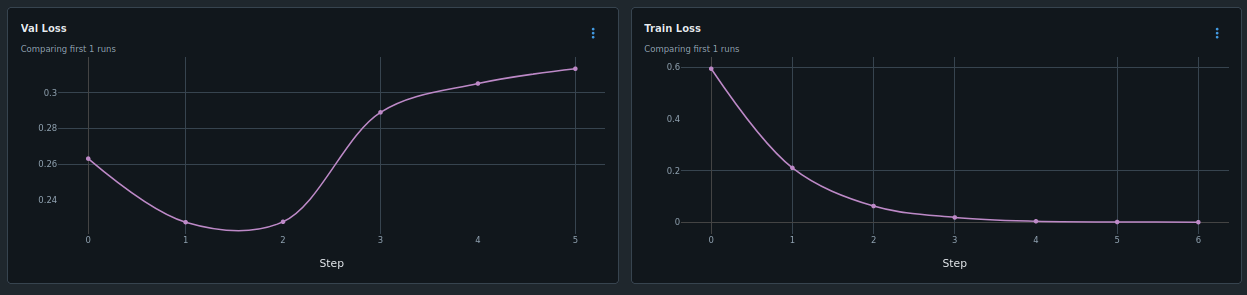

In [6]:
torch.cuda.empty_cache()

model = SentimentClassifierMultiLinear(len(class_names))
model = model.to(DEVICE)
optimizer, scheduler = optimizer_scheduler(model)

with mlflow.start_run():
    mlflow.set_tag("Model class", "SentimentClassifierMultiLinear")

    history = train_model(model,
                optimizer,
                scheduler,
                EPOCHS,
                DEVICE)

Epoch 1/7
----------
Train loss 0.5647501674565402 accuracy 0.7157142857142857
Val   loss 0.30894462551389423 accuracy 0.925

Epoch 2/7
----------
Train loss 0.23726094243201343 accuracy 0.9357142857142857
Val   loss 0.22271832717316492 accuracy 0.9

Epoch 3/7
----------
Train loss 0.11818666773086245 accuracy 0.9728571428571429
Val   loss 0.2786466468657766 accuracy 0.9

Epoch 4/7
----------
Train loss 0.04670283968814395 accuracy 0.9928571428571429
Val   loss 0.30523207198296276 accuracy 0.9

Epoch 5/7
----------
Train loss 0.02874017566103827 accuracy 0.9942857142857143
Val   loss 0.3198169193097523 accuracy 0.91

Epoch 6/7
----------
Train loss 0.014213743746619333 accuracy 0.9985714285714286
Val   loss 0.3048670557992799 accuracy 0.91

Epoch 7/7
----------
Train loss 0.007431825961578976 accuracy 1.0
Val   loss 0.30764434014313985 accuracy 0.915



In [8]:
torch.cuda.empty_cache()

model = SentimentClassifierUntrainedCLS(len(class_names))
model = model.to(DEVICE)
optimizer, scheduler = optimizer_scheduler(model)

with mlflow.start_run():
    mlflow.set_tag("Model class", "SentimentClassifierUntrainedCLS")

    history = train_model(model,
                optimizer,
                scheduler,
                EPOCHS,
                DEVICE)

Epoch 1/7
----------
Train loss 0.6147372587160631 accuracy 0.6371428571428571
Val   loss 0.2573325293404715 accuracy 0.9



2024/02/26 01:43:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp44gvye7r/model/data, flavor: pytorch), fall back to return ['torch==2.2.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Epoch 2/7
----------
Train loss 0.18097473833371291 accuracy 0.9328571428571428
Val   loss 0.18138821419727588 accuracy 0.93



2024/02/26 01:44:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp5vh9utr4/model/data, flavor: pytorch), fall back to return ['torch==2.2.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Epoch 3/7
----------
Train loss 0.038523142188999125 accuracy 0.9842857142857143
Val   loss 0.21643888993587876 accuracy 0.93

Epoch 4/7
----------
Train loss 0.007903138625393198 accuracy 0.9971428571428571
Val   loss 0.27313854634745177 accuracy 0.925

Epoch 5/7
----------
Train loss 0.0012998685309536415 accuracy 1.0
Val   loss 0.3133110120044356 accuracy 0.92

Epoch 6/7
----------
Train loss 0.0006750933270351114 accuracy 1.0
Val   loss 0.313779843933714 accuracy 0.92

Epoch 7/7
----------
Train loss 0.000404083192486062 accuracy 1.0
Val   loss 0.31611018577158184 accuracy 0.92



In [9]:
torch.cuda.empty_cache()

model = SentimentClassifierUntrainedCLSMultiLastLayers(len(class_names))
model = model.to(DEVICE)
optimizer, scheduler = optimizer_scheduler(model)

with mlflow.start_run():
    mlflow.set_tag("Model class", "SentimentClassifierUntrainedCLSMultiLastLayers")

    history = train_model(model,
                optimizer,
                scheduler,
                EPOCHS,
                DEVICE)

Epoch 1/7
----------
Train loss 1.4292005530812524 accuracy 0.51
Val   loss 0.18494456793580735 accuracy 0.925



2024/02/26 01:45:55 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpudlgb4q0/model/data, flavor: pytorch), fall back to return ['torch==2.2.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


Epoch 2/7
----------
Train loss 0.2150012908334082 accuracy 0.9271428571428572
Val   loss 0.17260872020519205 accuracy 0.92

Epoch 3/7
----------
Train loss 0.05300596922329119 accuracy 0.9842857142857143
Val   loss 0.35390151498307076 accuracy 0.91

Epoch 4/7
----------
Train loss 0.01168961919822984 accuracy 0.9971428571428571
Val   loss 0.34924546793003436 accuracy 0.915

Epoch 5/7
----------
Train loss 0.003382562791970982 accuracy 0.9985714285714286
Val   loss 0.3660351701795922 accuracy 0.915

Epoch 6/7
----------
Train loss 0.0009421888760037043 accuracy 1.0
Val   loss 0.3818658712386553 accuracy 0.915

Epoch 7/7
----------
Train loss 0.0008905511666935953 accuracy 1.0
Val   loss 0.37954467721283436 accuracy 0.91



In [30]:
# Free cuda memory

import gc
# del(model)
torch.cuda.empty_cache()
gc.collect()

0

In [23]:
# torch.cuda.empty_cache()

model = SentimentClassifierUntrainedCLSMultiLastLayersMultiLinear(len(class_names))
model = model.to(DEVICE)
optimizer, scheduler = optimizer_scheduler(model)

with mlflow.start_run():
    mlflow.set_tag("Model class", "SentimentClassifierUntrainedCLSMultiLastLayersMultiLinear")

    history = train_model(model,
                optimizer,
                scheduler,
                EPOCHS,
                DEVICE)

Epoch 1/7
----------
Train loss 0.593590730970556 accuracy 0.6614285714285715
Val   loss 0.26412220299243927 accuracy 0.915

Epoch 2/7
----------
Train loss 0.19024594009599902 accuracy 0.9257142857142857
Val   loss 0.15878217228289163 accuracy 0.925

Epoch 3/7
----------
Train loss 0.03307926187037744 accuracy 0.99
Val   loss 0.19749902316834778 accuracy 0.9450000000000001

Epoch 4/7
----------
Train loss 0.008786155594862066 accuracy 0.9971428571428571
Val   loss 0.23157357103523932 accuracy 0.9450000000000001

Epoch 5/7
----------
Train loss 0.005631250525105067 accuracy 0.9985714285714286
Val   loss 0.25111871287351406 accuracy 0.9450000000000001

Epoch 6/7
----------
Train loss 0.0005958760593784973 accuracy 1.0
Val   loss 0.257683685729197 accuracy 0.9450000000000001

Epoch 7/7
----------
Train loss 0.0005678565113074993 accuracy 1.0
Val   loss 0.258851776053364 accuracy 0.9450000000000001



By comparison, the last model seems to outperform others by a thin margin:

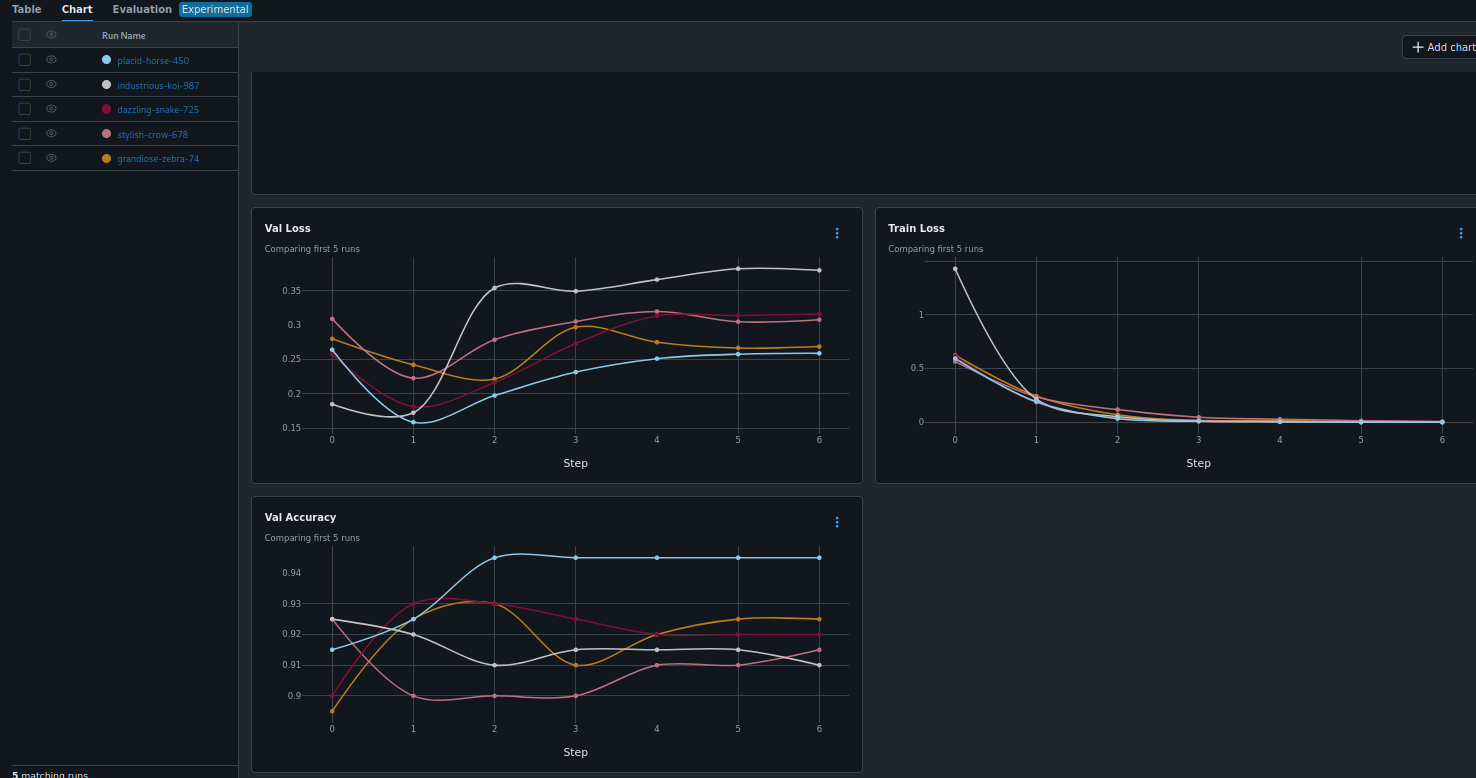

Next step is to train this architecture on 2 epochs, on the whole train+val dataset